## Neuroendocrine tumor histology subtype prediction model

### Random Forest Classifier 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix

In [10]:
# data = pd.read_csv("gene_data.csv", header = 0, index_col = 0)
data = pd.read_csv("gene_data_PDWD_deID.csv", header = 0, index_col = 0)
data = data.T
data = np.log(data +1)
y = [ 0 if d.split('_')[0] == 'WD' else 1 for d in data.index ]
data

Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
WD_0001,2.890372,6.643790,5.332719,5.010635,2.708050,3.295837,6.527958,6.837333,7.149917,1.945910,...,5.736572,6.563856,4.290459,6.214608,6.324359,3.828641,3.663562,4.736198,6.565265,5.758902
WD_0002,2.302585,6.643790,5.476464,5.351858,5.963579,3.871201,6.979145,6.442540,6.638568,2.639057,...,5.147494,5.998937,3.988984,5.746203,6.222576,3.806662,4.262680,4.521789,6.066108,5.365976
WD_0003,2.079442,6.626718,4.615121,4.882802,2.197225,6.003887,6.180017,5.117994,6.894670,2.197225,...,5.549076,6.562444,4.454347,6.089045,6.318968,3.610918,3.258097,4.727388,6.466145,5.220356
WD_0004,2.564949,6.994850,5.811141,4.143135,6.232448,4.369448,6.899723,6.947937,6.917706,2.397895,...,5.411646,6.551080,4.624973,6.295266,6.752270,4.174387,4.369448,5.036953,6.556778,5.808142
WD_0005,2.639057,6.131226,5.572154,5.976351,3.663562,4.682131,6.643790,6.152733,6.720220,2.484907,...,5.129899,6.751101,4.430817,6.368187,6.040255,3.610918,3.688879,4.753590,5.736572,5.902633
WD_0006,3.367296,6.865891,5.517453,6.016157,6.548219,3.806662,7.265430,6.688355,6.846943,2.639057,...,5.564520,6.533789,4.615121,6.175867,6.687109,4.043051,4.382027,5.068904,6.445720,5.733341
WD_0007,2.397895,6.313548,5.476464,5.924256,3.951244,4.962845,6.122493,4.564348,7.186901,2.079442,...,5.298317,6.431331,4.406719,6.393591,6.373320,3.367296,3.583519,5.003946,6.289716,5.828946
WD_0008,2.484907,5.828946,4.521789,3.526361,4.060443,2.484907,5.780744,5.634790,5.720312,1.791759,...,3.737670,4.532599,1.945910,4.025352,4.465908,3.091042,3.044522,3.178054,4.905275,4.189655
WD_0009,2.197225,6.575076,5.283204,5.129899,5.365976,4.094345,6.935370,6.642487,6.690842,1.791759,...,5.075174,6.008813,4.317488,5.894403,6.109248,3.713572,3.784190,4.634729,5.945421,5.451038
WD_0010,2.397895,6.478510,5.323010,4.290459,6.517671,3.496508,6.700731,6.603944,6.498282,2.079442,...,5.214936,6.335054,4.779123,6.242223,6.408529,4.060443,4.143135,4.997212,6.295266,5.564520


### Model learning and accuracy

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
    
    
# create a random forest classifier with 100 trees
rfc =  RandomForestClassifier(n_estimators=100, random_state = 2)

# fit the classifier to your data
rfc.fit(X_train, y_train)

# predict using the trained classifier
y_pred = rfc.predict(X_test)

print('Accuracy of RFC classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of RFC classifier on test set: 1.00


In [12]:
confusion_matrix = confusion_matrix(y_pred, y_test)
print(confusion_matrix)

[[5 0]
 [0 3]]


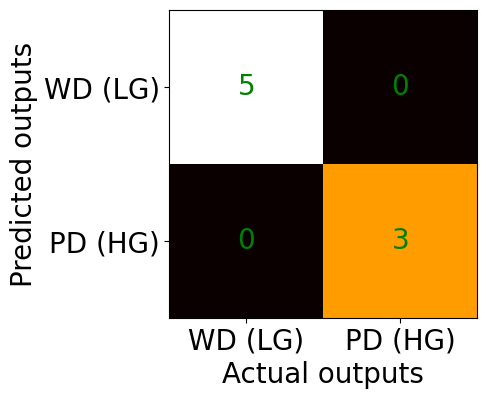

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(confusion_matrix, cmap='hot')
ax.grid(False)
ax.set_ylabel('Predicted outputs', fontsize=20, color='black')
ax.set_xlabel('Actual outputs', fontsize=20, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='green', fontsize=20)
ax.set_xticklabels(labels=["WD (LG)", "PD (HG)"], fontsize=20)
ax.set_yticklabels(labels=["WD (LG)", "PD (HG)"], fontsize=20)
plt.show()

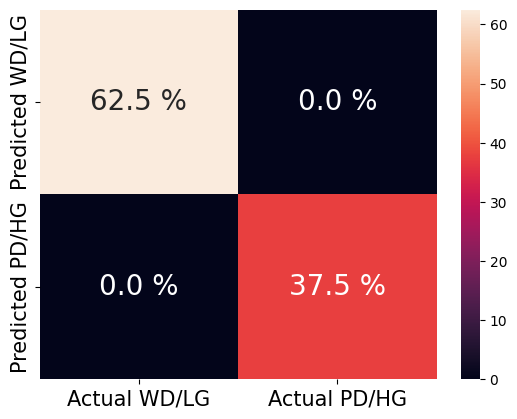

In [14]:
import seaborn as sns
df = pd.DataFrame((confusion_matrix/8)*100, columns=['Actual WD/LG', 'Actual PD/HG'], index=['Predicted WD/LG', 'Predicted PD/HG'])
ax = sns.heatmap(df, annot=True, fmt=".1f", annot_kws={"size": 20})
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig("confusion_matrix_rfc.png")
plt.show()

### 5-fold cross-validation

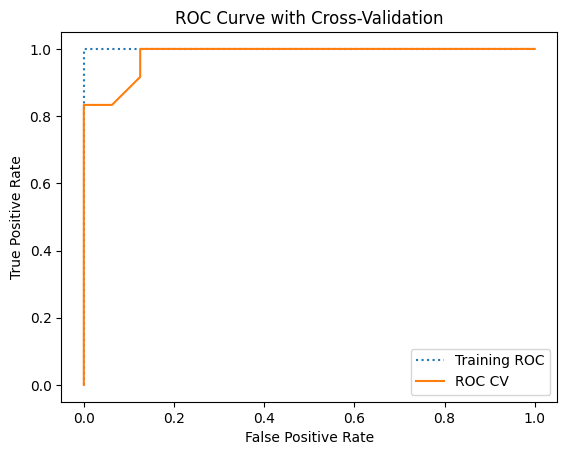

In [15]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Get the predicted probabilities for training and testing data
y_train_probs = rfc.predict_proba(X_train)[:, 1]
y_test_probs = rfc.predict_proba(X_test)[:, 1]

y_probs = cross_val_predict(rfc, X_train, y_train, method='predict_proba', cv=5)
y_probs = y_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_probs)

# Plot the ROC curve for the training data as a dotted line
plt.plot(fpr_train, tpr_train, linestyle='dotted', label='Training ROC')

plt.plot(fpr, tpr, label='ROC CV')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Cross-Validation')
plt.legend()
plt.savefig("roc_curve_rfc.png")
plt.show()

### Gini importance 

In [16]:
importances = rfc.feature_importances_

features = list(data.columns)

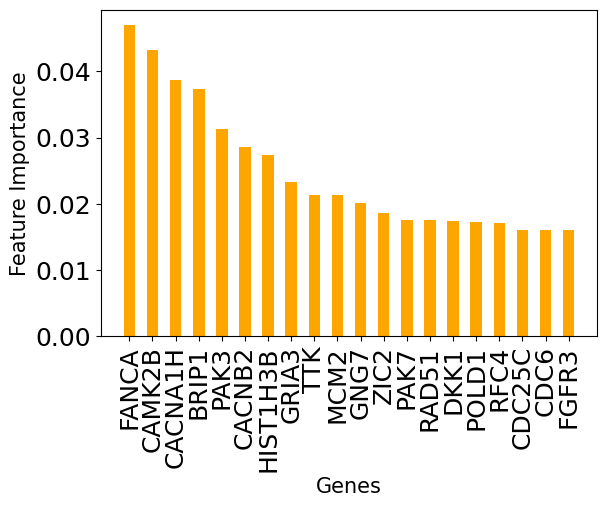

In [17]:
sorted_genes_weights = sorted(zip(features, importances), key=lambda x: x[1])
n = 20

#lowest_genes = sorted_genes_weights[:n]
highest_genes = sorted_genes_weights[-n:]
highest_genes = highest_genes[::-1]

# Extract the gene names and weights for the plot
gene_features = [g[0] for g in highest_genes]
gene_weights = [g[1] for g in highest_genes]

bar_width = 0.5
plt.bar(gene_features, gene_weights, width=bar_width, color ='orange')

plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)


plt.xlabel('Genes', fontsize=15)
plt.ylabel('Feature Importance', fontsize=15)
#plt.title('rfc Feature Importance')

plt.subplots_adjust(bottom=0.2)

plt.savefig("feature_importance_gini.png")
plt.show()

In [18]:
highest_genes

[('FANCA', 0.04697076023391813),
 ('CAMK2B', 0.043289952153110045),
 ('CACNA1H', 0.03865384615384616),
 ('BRIP1', 0.03728129713423831),
 ('PAK3', 0.03133333333333333),
 ('CACNB2', 0.028666666666666667),
 ('HIST1H3B', 0.027320512820512823),
 ('GRIA3', 0.02336898395721925),
 ('TTK', 0.021414141414141413),
 ('MCM2', 0.021393471509570584),
 ('GNG7', 0.02012753036437247),
 ('ZIC2', 0.018585858585858584),
 ('PAK7', 0.0175),
 ('RAD51', 0.0175),
 ('DKK1', 0.017407407407407406),
 ('POLD1', 0.017334385272846812),
 ('RFC4', 0.01715376676986584),
 ('CDC25C', 0.01611111111111111),
 ('CDC6', 0.016085858585858585),
 ('FGFR3', 0.01603742690058479)]

### SHAP Analysis

In [19]:
import shap

explainer = shap.TreeExplainer(rfc)
#explainer

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
shap_values = explainer.shap_values(X_test)
#shap_values

In [21]:
#shap_values[0]
#shap_values[1]

In [22]:
#np.array( shap_values )[0,:,data.columns.tolist().index('FANCA')]

In [23]:
#X_test.index

In [24]:
pd.DataFrame({'SHAP':np.array( shap_values )[0,:,data.columns.tolist().index('FANCA')]}, index = X_test.index)



,SHAP
PD_0011,-0.030873
WD_0021,0.018308
WD_0017,0.016701
PD_0010,-0.030873
PD_0002,-0.030873
WD_0016,0.018308
WD_0011,0.018308
WD_0003,-0.021136


In [25]:
shap_imp = [  "{}:{:.4f}".format( i, j ) for i, j in (zip( X_test.columns, np.abs( shap_values[0] ).mean(0).round(2) )) ]

#shap_imp



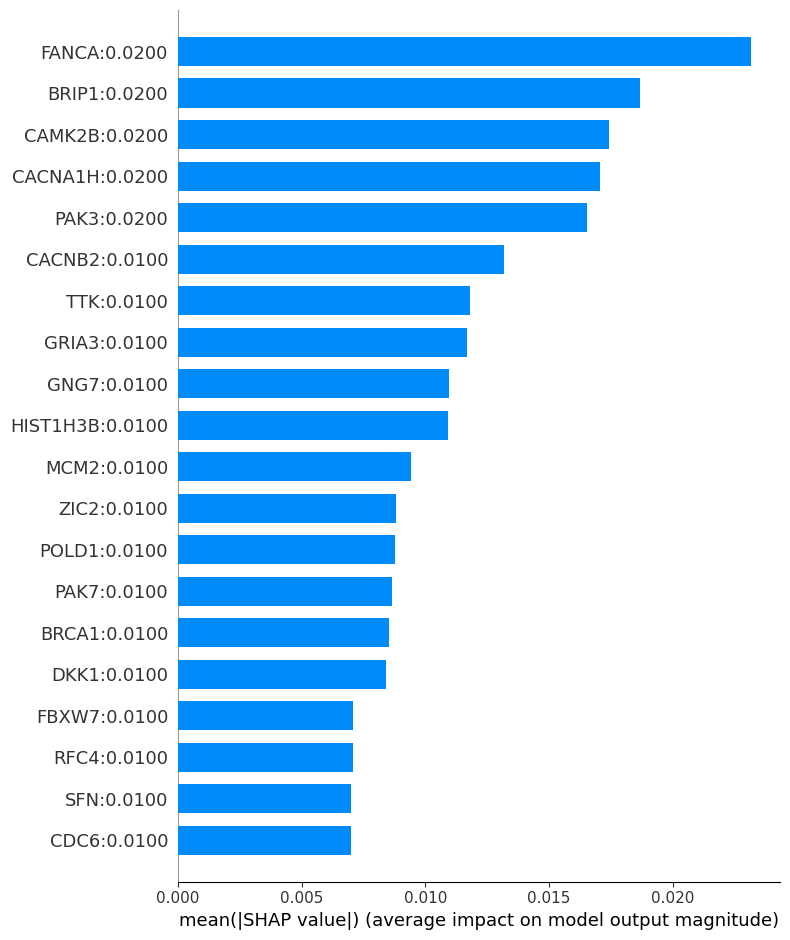

In [26]:
shap.summary_plot(  shap_values[0], X_test, feature_names = shap_imp, max_display = 20, plot_type= 'bar' )

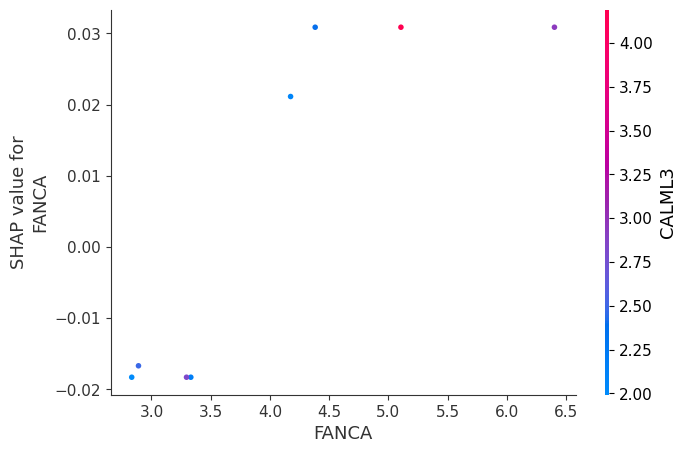

In [27]:
shap.dependence_plot( 'FANCA', shap_values[1], X_test ) 

In [28]:
sorted_genes_weights = sorted(zip(X_test.columns, shap_values[0].mean(0).round(5)), key=lambda x: x[1])

highest_genes = sorted_genes_weights[:10] + sorted_genes_weights[-10:]

gene_features = [g[0] for g in highest_genes]
gene_weights = [g[1] for g in highest_genes]

weights = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])
weights
#sorted_genes_weights[-20:]

,Gene,Feature Importance
0,GNG7,-0.00559
1,TTK,-0.00529
2,FANCA,-0.00527
3,DNMT1,-0.00484
4,HIST1H3B,-0.00481
5,CDC6,-0.00322
6,WNT4,-0.00315
7,BRCA1,-0.00252
8,RPA3,-0.00239
9,SFN,-0.00221


### SHAP 0-WD importance

In [29]:
DeepnoteChart(weights, spec_dict={
  "layer": [
    {
      "layer": [
        {
          "mark": {
            "clip": True,
            "type": "bar",
            "color": "#4b371c",
            "tooltip": True
          },
          "encoding": {
            "x": {
              "sort": None,
              "type": "nominal",
              "field": "Gene",
              "scale": {
                "type": "linear"
              }
            },
            "y": {
              "sort": None,
              "type": "quantitative",
              "field": "Feature Importance",
              "scale": {
                "type": "linear"
              },
              "format": {
                "type": "default",
                "decimals": None
              },
              "aggregate": "sum",
              "formatType": "numberFormatFromNumberType"
            },
            "opacity": {
              "condition": {
                "test": {
                  "and": [
                    {
                      "param": "legend_size_0"
                    },
                    {
                      "param": "legend_color_0"
                    },
                    {
                      "param": "interval_selection"
                    }
                  ]
                },
                "value": 1
              },
              "value": 0.2
            }
          },
          "params": [
            {
              "name": "legend_size_0",
              "select": {
                "type": "point",
                "encodings": [
                  "size"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "legend_color_0",
              "select": {
                "type": "point",
                "encodings": [
                  "color"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "interval_selection",
              "select": {
                "type": "interval",
                "encodings": [
                  "x",
                  "y"
                ]
              }
            }
          ]
        }
      ]
    }
  ],
  "title": "SHAP[0]",
  "config": {
    "legend": {
      "labelFont": "Arial",
      "labelFontSize": 18,
      "titleFont": "Arial",
      "titleFontSize": 18,
      "titleFontWeight": "bold"
    },
    "title": {
      "anchor": "start",
      "color": "#40566C",
      "font": "Arial",
      "fontSize": 20,
      "fontWeight": "bold",
      "dy": -16
    },
    "axis": {
      "labelFont": "Arial",
      "labelFontSize": 18,
      "labelFontWeight": "normal",
      "titleFont": "Arial",
      "titleFontSize": 18,
      "titleFontWeight": "bold",
      "labelOverlap": "parity"
    },
    "customFormatTypes": True
  },
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "encoding": {},
  "height": 481,
  "width": 600,
  "padding": 32,
  "autosize": {
    "type": "fit"
  }
})

In [30]:
sorted_genes_weights = sorted(zip(X_test.columns, shap_values[1].mean(0).round(5)), key=lambda x: x[1])

highest_genes = sorted_genes_weights[:10] + sorted_genes_weights[-10:]

gene_features = [g[0] for g in highest_genes] #for g in sorted_genes_weights
gene_weights = [g[1] for g in highest_genes] 

weights = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])

weights.to_csv('shap1_importance.csv', index=False)


weights

,Gene,Feature Importance
0,CAMK2B,-0.00580
1,PRL,-0.00394
2,BRIP1,-0.00346
3,CCNE1,-0.00321
4,PAK3,-0.00276
5,PAK7,-0.00275
6,DKK1,-0.00271
7,SETBP1,-0.00249
8,HOXA10,-0.00244
9,RFC4,-0.00235


In [31]:
content_list = []
for index, row in weights.iterrows():
    content_list.append(f"('{row['Gene']}', {row['Feature Importance']})")
content_list

["('CAMK2B', -0.0058)",
 "('PRL', -0.00394)",
 "('BRIP1', -0.00346)",
 "('CCNE1', -0.00321)",
 "('PAK3', -0.00276)",
 "('PAK7', -0.00275)",
 "('DKK1', -0.00271)",
 "('SETBP1', -0.00249)",
 "('HOXA10', -0.00244)",
 "('RFC4', -0.00235)",
 "('SFN', 0.00221)",
 "('RPA3', 0.00239)",
 "('BRCA1', 0.00252)",
 "('WNT4', 0.00315)",
 "('CDC6', 0.00322)",
 "('HIST1H3B', 0.00481)",
 "('DNMT1', 0.00484)",
 "('FANCA', 0.00527)",
 "('TTK', 0.00529)",
 "('GNG7', 0.00559)"]

### SHAP 1-PD importance

In [32]:
DeepnoteChart(weights, spec_dict={
  "layer": [
    {
      "layer": [
        {
          "mark": {
            "clip": True,
            "type": "bar",
            "color": "#54a24b",
            "tooltip": True
          },
          "encoding": {
            "x": {
              "sort": None,
              "type": "nominal",
              "field": "Gene",
              "scale": {
                "type": "linear"
              }
            },
            "y": {
              "sort": None,
              "type": "quantitative",
              "field": "Feature Importance",
              "scale": {
                "type": "linear"
              },
              "format": {
                "type": "default",
                "decimals": None
              },
              "aggregate": "sum",
              "formatType": "numberFormatFromNumberType"
            },
            "opacity": {
              "condition": {
                "test": {
                  "and": [
                    {
                      "param": "legend_size_0"
                    },
                    {
                      "param": "legend_color_0"
                    },
                    {
                      "param": "interval_selection"
                    }
                  ]
                },
                "value": 1
              },
              "value": 0.2
            }
          },
          "params": [
            {
              "name": "legend_size_0",
              "select": {
                "type": "point",
                "encodings": [
                  "size"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "legend_color_0",
              "select": {
                "type": "point",
                "encodings": [
                  "color"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "interval_selection",
              "select": {
                "type": "interval",
                "encodings": [
                  "x",
                  "y"
                ]
              }
            }
          ]
        }
      ]
    }
  ],
  "title": "SHAP[1]",
  "config": {
    "legend": {
      "labelFont": "Arial",
      "labelFontSize": 18,
      "titleFont": "Arial",
      "titleFontSize": 18,
      "titleFontWeight": "bold"
    },
    "title": {
      "anchor": "start",
      "color": "#40566C",
      "font": "Arial",
      "fontSize": 20,
      "fontWeight": "bold",
      "dy": -16
    },
    "axis": {
      "labelFont": "Arial",
      "labelFontSize": 20,
      "labelFontWeight": "normal",
      "titleFont": "Arial",
      "titleFontSize": 18,
      "titleFontWeight": "bold",
      "labelOverlap": "parity"
    },
    "customFormatTypes": True
  },
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "encoding": {},
  "height": 481,
  "width": 500,
  "padding": 20,
  "autosize": {
    "type": "fit"
  }
})

In [33]:
#sorted_genes_weights

gene_features = [g[0] for g in sorted_genes_weights]
gene_weights = [g[1] for g in sorted_genes_weights]

df = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])
df


,Gene,Feature Importance
0,CAMK2B,-0.00580
1,PRL,-0.00394
2,BRIP1,-0.00346
3,CCNE1,-0.00321
4,PAK3,-0.00276
...,...,...
779,HIST1H3B,0.00481
780,DNMT1,0.00484
781,FANCA,0.00527
782,TTK,0.00529


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26a52daa-3781-4303-b6d1-419771ff77cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>